# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

https://archive.ics.uci.edu/ml/datasets/Covertype

Forest CoverType dataset (cobertura florestal a partir de variáveis ​​cartográficas). Dados do Sistema de Informações sobre Recursos (RIS) da Região 2 do Serviço Florestal dos EUA (USFS).

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [44]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import SVG, Image
from IPython.display import display
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

pd.__version__

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Montando o dataset
data_set = "/content/drive/My Drive/04 - UNI-BH/POS/PROJETO_2/covtype.data" # data set completo

Mounted at /content/drive


In [0]:
# Rotulando as features, ja que o dataset nao possuia rotulos identificados no proprio arquivo. Sera que é correto fazer assim?
# Name / Data Type / Measurement / Description
features = ["Elevation",# quantitative /meters / Elevation in meters
            "Aspect", # quantitative / azimuth / Aspect in degrees azimuth
            "Slope", # quantitative / degrees / Slope in degrees
            "Horizontal_Distance_To_Hydrology", # quantitative / meters / Horz Dist to nearest surface water features
            "Vertical_Distance_To_Hydrology", # quantitative / meters / Vert Dist to nearest surface water features
            "Horizontal_Distance_To_Roadways", # quantitative / meters / Horz Dist to nearest roadway
            "Hillshade_9am", # quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
            "Hillshade_Noon", # quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
            "Hillshade_3pm", # quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
            "Horizontal_Distance_To_Fire_Points", # quantitative / meters / Horz Dist to nearest wildfire ignition points
            "Wilderness_Area_01", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
            "Wilderness_Area_02", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
            "Wilderness_Area_03", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designatioN
            "Wilderness_Area_04", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
            "Soil_Type_01", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_02", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_03", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_04", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_05", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_06", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_07", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_08", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_09", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_10", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_11", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_12", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_13", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_14", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_15", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_16", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_17", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_18", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_19", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_20", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_21", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_22", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_23", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_24", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_25", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_26", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_27", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_28", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_29", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_30", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_31", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_32", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_33", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_34", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_35", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_36", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_37", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_38", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_39", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_40", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation            
            "Cover_Type" # (7 types) / integer / 1 to 7 / Forest Cover Type designation 
            ]
# Cover_Type => Este é nosso alvo que iremos classificar em funcao das demais feaures a partir do treino.

In [0]:
# Carregando o dataset
df = pd.read_csv(data_set
    ,names=features
    ,sep=r','
    #,decimal=','
    ,header=1 
    #,encoding='utf8' # considera acentuacao
    ,engine='python')
    #,na_values="?").dropna() # apaga tuplas com pelo menos uma feature fazia

In [149]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [72]:
# Como estao os dados?
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_01,Wilderness_Area_02,Wilderness_Area_03,Wilderness_Area_04,Soil_Type_01,Soil_Type_02,Soil_Type_03,Soil_Type_04,Soil_Type_05,Soil_Type_06,Soil_Type_07,Soil_Type_08,Soil_Type_09,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Os dados categóricos ja estao binarizados no dataset, que são as feaures "Wilderness_Area" com 4 categorias e "Soil_type" com 40.

In [48]:
# vamos ver o tamanho do dataset
df.shape

(581010, 55)

In [49]:
# vamos ver se possui valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581010 entries, 0 to 581009
Data columns (total 55 columns):
Elevation                             581010 non-null int64
Aspect                                581010 non-null int64
Slope                                 581010 non-null int64
Horizontal_Distance_To_Hydrology      581010 non-null int64
Vertical_Distance_To_Hydrology        581010 non-null int64
Horizontal_Distance_To_Roadways       581010 non-null int64
Hillshade_9am                         581010 non-null int64
Hillshade_Noon                        581010 non-null int64
Hillshade_3pm                         581010 non-null int64
Horizontal_Distance_To_Fire_Points    581010 non-null int64
Wilderness_Area_01                    581010 non-null int64
Wilderness_Area_02                    581010 non-null int64
Wilderness_Area_03                    581010 non-null int64
Wilderness_Area_04                    581010 non-null int64
Soil_Type_01                          581010 non-

In [50]:
# Conferindo se realmente nao ha nulos
round(df.isnull().mean()*100,2)

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area_01                    0.0
Wilderness_Area_02                    0.0
Wilderness_Area_03                    0.0
Wilderness_Area_04                    0.0
Soil_Type_01                          0.0
Soil_Type_02                          0.0
Soil_Type_03                          0.0
Soil_Type_04                          0.0
Soil_Type_05                          0.0
Soil_Type_06                          0.0
Soil_Type_07                          0.0
Soil_Type_08                          0.0
Soil_Type_09                          0.0
Soil_Type_10                      

In [51]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


(1, 1466.8601177336277)

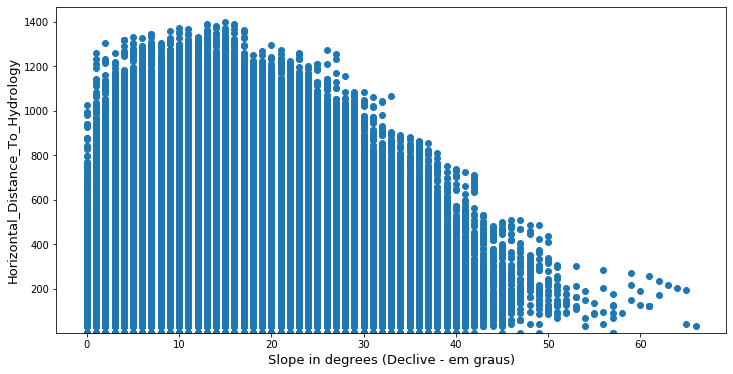

In [68]:
# explorando uma rapida visualizacao do declive (slope) em funcao da cobertura
plt.figure(figsize=(12,6))
#plt.scatter(x=df.Slope, y=df.Cover_Type)
plt.scatter(x=df.Slope, y=df.Horizontal_Distance_To_Hydrology)
plt.xlabel("Slope in degrees (Declive - em graus)", fontsize=13)
plt.ylabel("Horizontal_Distance_To_Hydrology", fontsize=13)
plt.ylim(1)

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

**Gaussian Naive Bayes**

Os métodos Naive Bayes são um conjunto de algoritmos de aprendizado supervisionado com base na aplicação do teorema de Bayes com a suposição "ingênua" de independência condicional entre cada par de recursos, dado o valor da variável de classe.


#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [334]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
import sklearn
from sklearn.model_selection import train_test_split

# Organizando nossos dados para fazer o split
label_names = np.array(features[54]) # label alvo da feature: 54 = Cover_Type
labels = np.array(df[label_names]) # conteudo do label alvo: Cover_Type

feature_names = np.array(features[0:54]) # sao as features, sem o alvo
feature_data = np.array(df[feature_names]) # conteudo das demais features

# vamos dar uma olhada no dados das demais features:
#feature_names
print(labels)
print(feature_data)

[2 2 5 ... 3 3 3]
[[2804  139    9 ...    0    0    0]
 [2785  155   18 ...    0    0    0]
 [2595   45    2 ...    0    0    0]
 ...
 [2386  159   17 ...    0    0    0]
 [2384  170   15 ...    0    0    0]
 [2383  165   13 ...    0    0    0]]


In [335]:
# Dividir nossos dados em treino e teste. Para o baseline estou utilizando 70 de treino.
train, test, train_labels, test_labels = train_test_split(feature_data, # valores de treino
                                                          labels,  # valores alvo de feature_data
                                                          train_size=0.70,
                                                          random_state=42) 
test_labels

array([2, 3, 2, ..., 3, 2, 2])

In [314]:
#importar o modulo GaussianNB: algoritmo simples que geralmente funciona bem em tarefas de classificação binaria
from sklearn.naive_bayes import GaussianNB

# Inicializando nosso classificador
clf_gnb = GaussianNB()

# Treinando nosso classificador (fazendo o fit)
modelo_01 = clf_gnb.fit(train, train_labels, ) # par de dados de treino e o resultado alvo do treino
modelo_01

GaussianNB(priors=None, var_smoothing=1e-09)

In [332]:
# Fazendo as previsões
previsao_01 = clf_gnb.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_01

array([3, 3, 1, ..., 3, 1, 5])

In [330]:
# valor medio e padrao do train
print("Mean value of train: {} Std value of train: {}". format(train_labels.mean(), train_labels.std()))

Mean value of train: 2.050744147506682 Std value of train: 1.3950799762098163


In [329]:
# valor medio e padrao do test
print("Mean value of test: {} Std value test: {}". format(test_labels.mean(), test_labels.std()))

Mean value of test: 2.0531316156348427 Std value test: 1.3997890790201815


In [354]:
# Vamos ver o score
from sklearn.metrics import mean_squared_error
# Perda de regressão ao erro quadrático médio
train_score = mean_squared_error(clf_gnb.predict(train), train_labels)
test_score = mean_squared_error(clf_gnb.predict(test), test_labels)
#
print("Train MSE modelo_02: {} Test MSE modelo_02: {}".format(train_score, test_score)) 

Train MSE modelo_02: 3.759087008583575 Test MSE modelo_02: 3.7447261378174788


In [355]:
# Avaliando a precisao do modelo
from sklearn.metrics import accuracy_score

# Avaliar a precisão
print('Percentual de precisao do modelo baseline 01: %f' %(accuracy_score(test_labels, previsao_01)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

Percentual de precisao do modelo baseline 01: 45.940116 %

Caramba, apenas 46% de acerto. Muito baixo! Como posso melhorar isso?
Por que os valores da média e padrao do treino e teste estao bem proximos, porém a acurária é baixa? Qual a relação?

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

**Decision Trees**

Só para lembrar mesmo, o que é uma decision tree:
As árvores de decisão (TD) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que prediga o valor de uma variável de destino, aprendendo regras simples de decisão inferidas a partir dos recursos de dados.

Por exemplo, no exemplo abaixo, as árvores de decisão aprendem com os dados a aproximação de uma curva senoidal com um conjunto de regras de decisão if-then-else. Quanto mais profunda a árvore, mais complexas são as regras de decisão e mais adequado o modelo.

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [342]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
# Dividir nossos dados em treino e teste. Para o baseline estou utilizando 70 de treino.
train, test, train_labels, test_labels = train_test_split(feature_data, # valores de treino
                                                          labels,  # valores alvo do treino feature_data
                                                          train_size=0.70,
                                                          random_state=42) 
train_labels

array([1, 2, 1, ..., 2, 2, 1])

In [370]:
#importar o modulo DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# criando o classificador com a decision tree regressor, sem cross validation, parametros default
clf_dtr = DecisionTreeRegressor(max_features=None)

# Treinando nosso classificador (fazendo o fit)
modelo_02 = clf_dtr.fit(train, train_labels) # par de dados de treino e o resultado alvo do treino
modelo_02

# Fazendo as previsoes
previsao_02 = clf_dtr.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_02

# Avaliando a precisão
print('Percentual de precisao do modelo baseline 02: %f' %(accuracy_score(test_labels, previsao_02)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

Percentual de precisao do modelo baseline 02: 93.343201 %

In [374]:
# Vamos ver o score
from sklearn.metrics import mean_squared_error
# Perda de regressão ao erro quadrático médio
train_score = mean_squared_error(clf_dtr.predict(train), train_labels)
test_score = mean_squared_error(clf_dtr.predict(test), test_labels)
#
print("Train MSE modelo_02: {} Test MSE modelo_02: {}".format(train_score, test_score)) 

Train MSE modelo_02: 0.0 Test MSE modelo_02: 0.33756160249680156


In [0]:
# vamos plotar a arvore de decisao
graph = Source(tree.export_graphviz(clf_dtr, out_file=None, feature_names=feature_names, filled = True))
display(Image(graph.pipe(format='png')))

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

# criando o classificador com a decision tree regressor e com cross-validation
param_grid={
        'min_samples_split': range(2, 100, 5),
        'max_depth' : range(1, 20),
        'min_samples_leaf' : range(5,20),
        'min_impurity_decrease' : np.arange(0,1, 0.01),
        }

clf_dtr_cv = DecisionTreeRegressor()
clf_dtr_cv = RandomizedSearchCV(clf_dtr_cv, param_grid, iid=True, n_iter=1000, scoring='neg_mean_squared_error', random_state=42, refit=True)

# Treinando nosso classificador (fazendo o fit) otimizado
modelo_02_otm = clf_dtr_cv.fit(train, train_labels) # par de dados de treino e o resultado alvo do treino
modelo_02_otm

train_score = clf_dtr_cv.best_score_
test_score = mean_squared_error(clf_dtr_cv.predict(test), test_labels)

print("Best params: {}".format(clf_dtr_cv.best_params_))
print("Train MSE modelo_02 otimizado: {} Test MSE modelo_02 otiizado: {}".format(train_score, test_score))


In [0]:
#vamos ver se consegue plotar a arvore:
graph = Source(tree.export_graphviz(clf_cv.best_estimator_, out_file=None, feature_names=X.columns, filled = True))
display(Image(graph.pipe(format='png')))

In [0]:
# Fazendo as previsoes após otimizacao
previsao_02_otm = clf_dtr_cv.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_02_otm

# Avaliando a precisão
print('Percentual de precisao do modelo baseline 02 otimizado: %f' %(accuracy_score(test_labels, previsao_02_otm)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

Os dados do dataset foram coletados de um sistema GIS e/ou cartográficos, não apresentado nulos no dataset e a feature do tipo de solo que é categorico já tinha sido binarizada. 

Utilizei dois algoritmos para a classificação do tipo de cobertura vegetal (Cover_Type), o nosso *target*, sendo:

  **Gaussian Naive Bayes** 

  **Decision Tree Regressor**

    Resultados do baseline:

Fazendo o fit nos classificadores com os mesmos parâmetros de treino (70% da base) considerando o baseline, o primeiro algoritmo apresentou uma acurária de apenas 46% e o segundo de 93%, ou seja, 47% melhor do que o primeiro modelo !!!

Ainda preciso entender porque o segundo modelo apresentou a melhor acurácia! Quando saber qual o melhor algoritmo a utilizar de acordo com a base de dados?

    Resultados após otimizacao:



